# Linear Regression: Predicting and Forecasting
## Sources: 
1. <a href="https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/" target="_blank">Python Programming: Regression - Forecasting and Predicting</a>

In the previous notebooks, we learned what linear regression is, as well as how to train and test out data.  In this notebook, we will use our trained model to predict new values and forecast out into the future.

In [1]:
# Import dependencies
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Import data
import os
data_file_path = os.path.join("Data","stock_data.csv")

stock_data = pd.read_csv(data_file_path)
print(stock_data.head())

   Adj. Close  High_Low_Volatility_Percent  Daily_Percent_Change  Adj. Volume  \
0   50.322842                     8.441017              0.324968   44659000.0   
1   54.322689                     8.537313              7.227007   22834300.0   
2   54.869377                     4.062357             -1.227880   18256100.0   
3   52.597363                     7.753210             -5.726357   15247300.0   
4   53.164113                     3.966115              1.183658    9188600.0   

    Forecast  
0  69.078238  
1  67.839414  
2  68.912727  
3  70.668146  
4  71.219849  


In [3]:
# Define features
X = np.array(stock_data.drop(["Forecast"], 1))

# Define label
y = np.array(stock_data["Forecast"])

In [4]:
# Scale features
X = preprocessing.scale(X)

In [5]:
# Define the number of days out we want to forecast
# In this case, want to forecast out 1% of the dataframe
import math
forecast_out = math.ceil(0.01*len(stock_data))

# Only include values up until the row before the Forecast values become null
# or rather, exclude the last 1% of values
# Recall that when specifying a range,
# Python excludes the last value
X = X[:-forecast_out]
y = y[:-forecast_out]

In [6]:
# Confirm features and labels are the same length
length_of_features = len(X)
length_of_label = len(y)

print(f"Length of features: {length_of_features}")
print(f"Length of label: {length_of_label}")

Length of features: 3389
Length of label: 3389


In [7]:
# Define training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Define which classification algorithm we are using
classifier = LinearRegression()

In [9]:
# Fit- or train- the classifier
classifier.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Print the saccuracy of the classifier
print(classifier.score(X_test, y_test))

0.9788244499714819


### Note!

Recall that we engineered the label column- or the Forecast column- by shifting the values in the Adj. Close column up 35 values.  This would mean that the last 35 rows in the Forecast column have no value.  We will show this more clearly by looking at the last 37 rows of the dataframe.

In [11]:
# Preview last 35 columns of data
print(stock_data.tail(37))

      Adj. Close  High_Low_Volatility_Percent  Daily_Percent_Change  \
3387     1119.20                     1.811604             -0.729098   
3388     1068.76                     5.512236             -2.893850   
3389     1084.43                     5.569849              4.879205   
3390     1055.41                     3.025734             -2.724499   
3391     1005.60                     5.851043             -5.120439   
3392     1043.43                     5.488465              1.710726   
3393     1054.56                     1.920631             -0.199684   
3394     1054.14                     1.365911              0.394286   
3395     1072.70                     2.445228              1.743304   
3396     1091.36                     2.517733              0.730075   
3397     1095.50                     1.535431              0.193894   
3398     1103.59                     2.411927              0.991068   
3399     1113.75                     2.590496              0.419259   
3400  

Consequently, this is what we shall predict- the missing values in the forecast column.

In [12]:
# Define what we want to forecast
# Recall that X is defined as: X = X[:-forecast_out]
# We will therefore forecast out using "the rest" of the features,
# That is, X was defined as every row up to ath row,
# where a is defined as the ceiling function of 1% of the dataframe,
# and X_forecast will include every row from the ath row to the last.
X_forecast = X[-forecast_out:]
# X_forecast = preprocessing.scale(X_forecast)

We are now ready to forecast out into the future.  To do this, we will simply pass the X_forecast array into the .predict() method of our classifier, and we are done.

In [13]:
# Make prediction(s)
forecast = classifier.predict(X_forecast)

In [14]:
# Preview forecasted values
print(forecast)

[1076.57287662 1090.61977004 1104.2035149  1099.19428287 1092.81783544
 1090.76596048 1089.53485531 1085.59696428 1079.85319233 1075.35776371
 1073.65667413 1091.40360671 1109.9156776  1115.75703649 1130.21637988
 1134.57708342 1132.80434879 1130.55226921 1132.28730017 1149.30074482
 1149.11600154 1158.73571266 1155.45568558 1163.8016024  1183.07953264
 1196.65251156 1190.39525969 1202.51014293 1206.96330521 1206.72017811
 1197.52468873 1202.33766941 1200.96588195 1136.53635362 1080.49291103]


The values printed above are the predicted values for the next $a$ days, where $a$ is 1% of the length of the dataframe.  Using Linear Regression, we have forecasted out future stock prices.  We will now visualize this forecast.

Recall that the last $a$ rows of the Forecast column in our stock_data dataframe are NaN values, where $a$ is 1% of the length of the dataframe.  We will therefore fill these values in with our forecast array.

In [15]:
# Recall that the a rows of the Forecast column in our stock_data dataframe are NaN values,
# where a is 1% of the length of the dataframe
print(stock_data.tail(forecast_out+2))

      Adj. Close  High_Low_Volatility_Percent  Daily_Percent_Change  \
3387     1119.20                     1.811604             -0.729098   
3388     1068.76                     5.512236             -2.893850   
3389     1084.43                     5.569849              4.879205   
3390     1055.41                     3.025734             -2.724499   
3391     1005.60                     5.851043             -5.120439   
3392     1043.43                     5.488465              1.710726   
3393     1054.56                     1.920631             -0.199684   
3394     1054.14                     1.365911              0.394286   
3395     1072.70                     2.445228              1.743304   
3396     1091.36                     2.517733              0.730075   
3397     1095.50                     1.535431              0.193894   
3398     1103.59                     2.411927              0.991068   
3399     1113.75                     2.590496              0.419259   
3400  

In [16]:
# Fill in NaN values with forecast array
stock_data["Forecast"][-forecast_out:] = forecast

# Preview tail of dataframe,
# to confirm NaN values have been filled
print(stock_data.tail(forecast_out+2))

      Adj. Close  High_Low_Volatility_Percent  Daily_Percent_Change  \
3387     1119.20                     1.811604             -0.729098   
3388     1068.76                     5.512236             -2.893850   
3389     1084.43                     5.569849              4.879205   
3390     1055.41                     3.025734             -2.724499   
3391     1005.60                     5.851043             -5.120439   
3392     1043.43                     5.488465              1.710726   
3393     1054.56                     1.920631             -0.199684   
3394     1054.14                     1.365911              0.394286   
3395     1072.70                     2.445228              1.743304   
3396     1091.36                     2.517733              0.730075   
3397     1095.50                     1.535431              0.193894   
3398     1103.59                     2.411927              0.991068   
3399     1113.75                     2.590496              0.419259   
3400  

<function matplotlib.pyplot.show(*args, **kw)>

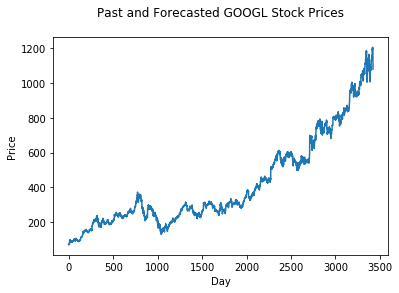

In [17]:
# import plotting library and visualize past data,
# along with forecasted data
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(stock_data["Forecast"])
plt.title("Past and Forecasted GOOGL Stock Prices\n")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show

As can be seen in the plot above, we can view the forecasted values, but we can't tell where the past data actually stops, and the forecasted values begin.  For situations such as this, it may be beneficial to use past data and forecasted data as separate datasets, while still plotting on the same graph.

In [18]:
# Create new dataframe,
# containing only the last a rows of the original,
# where a is 1% of the length of the dataframe
stock_data_forecast = stock_data[-forecast_out:].copy()

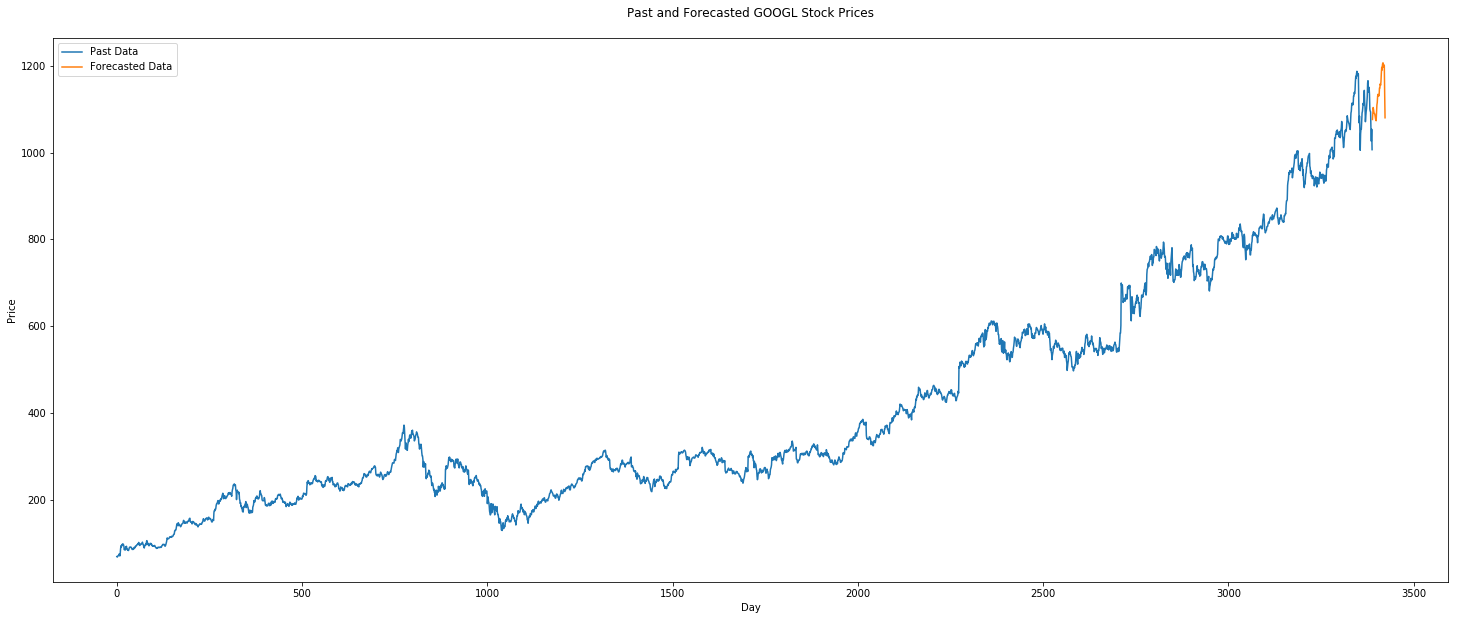

In [19]:
plt.figure(figsize=(25,10))
plt.plot(stock_data["Forecast"][:-forecast_out],label="Past Data")
plt.plot(stock_data_forecast["Forecast"], label="Forecasted Data")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Past and Forecasted GOOGL Stock Prices\n")
plt.show()

### ATTENTION!

We have a unique identifier column filled with consecutive integers, which you could think of as representing which day the stock price is for.  We have not accounted for weekends, holidays, or any other day whereon stocks would not be traded.  If this were a serious machine learning forecast, we would need to take these days into consideration.  However, the main point of this project is to learn the fundamentals of machine learning- not build a perfect model, which goes beyond just macine learning- so we will skip this consideration.  In a real-world project though, you will need to account for such considerations if you want an honest and accurate machine learning model.